In [2]:
import matplotlib
import numpy as np;
import matplotlib.pylab as plt
import pandas as pd
import sklearn as svm

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

diabetes = load_diabetes()
LEARNING_RATE = 0.99
r = 100000
df_x = diabetes.data
df_y = diabetes.target
np_x = np.array(df_x)
np_y = np.array(df_y)               #0.2            0.1         0.01            0.5                 0.001/200000
np_x = np.delete(np_x, 9, axis=1)   #2946.4605                                  2937.2121               3554.7540
#np_x = np.delete(np_x, 8, axis=1)   #3153.8699                  3930.6088       3100.9387              3930
#np_x = np.delete(np_x, 7, axis=1)   #3211.1227  3290.9454       4047                            3302
#np_x = np.delete(np_x, 6, axis=1)
# np_x = np.delete(np_x, 5, axis=1)
# np_x = np.delete(np_x, 4, axis=1)
# np_x = np.delete(np_x, 3, axis=1)
# np_x = np.delete(np_x, 2, axis=1)



train, test 셋을 분리합니다.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(np_x,
                                                    np_y,
                                                    test_size=0.2,
                                                    random_state=15)



Decision Tree Accuracy = 0.9473684210526315

In [4]:
W = np.random.rand(len(np_x[1]))
b = np.random.rand()
losses = []

def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L




def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

for i in range(1, r):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 1000 : Loss 2951.5816
Iteration 2000 : Loss 2946.5247
Iteration 3000 : Loss 2942.9599
Iteration 4000 : Loss 2939.9586
Iteration 5000 : Loss 2937.3323
Iteration 6000 : Loss 2934.9787
Iteration 7000 : Loss 2932.8389
Iteration 8000 : Loss 2930.8770
Iteration 9000 : Loss 2929.0696
Iteration 10000 : Loss 2927.3999
Iteration 11000 : Loss 2925.8549
Iteration 12000 : Loss 2924.4242
Iteration 13000 : Loss 2923.0986
Iteration 14000 : Loss 2921.8701
Iteration 15000 : Loss 2920.7313
Iteration 16000 : Loss 2919.6757
Iteration 17000 : Loss 2918.6970
Iteration 18000 : Loss 2917.7897
Iteration 19000 : Loss 2916.9486
Iteration 20000 : Loss 2916.1688
Iteration 21000 : Loss 2915.4458
Iteration 22000 : Loss 2914.7756
Iteration 23000 : Loss 2914.1542
Iteration 24000 : Loss 2913.5780
Iteration 25000 : Loss 2913.0439
Iteration 26000 : Loss 2912.5487
Iteration 27000 : Loss 2912.0896
Iteration 28000 : Loss 2911.6640
Iteration 29000 : Loss 2911.2694
Iteration 30000 : Loss 2910.9035
Iteration 31000 : L

예측결과를 표시합니다.

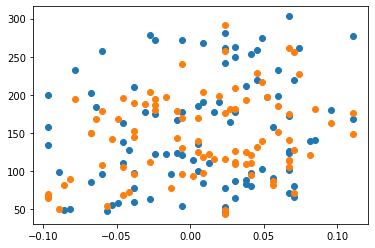

In [5]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()